In [253]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time

In [254]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((16, 16))])
batch_size = 1
sample_count = 1000

X_train = datasets.SVHN(root="./data", split='train', download=True, transform=transform)
idx = np.append(
    np.where(X_train.labels == 0)[0][:sample_count],
    np.where(X_train.labels == 1)[0][:sample_count],
)
X_train.data = X_train.data[idx]
X_train.labels = X_train.labels[idx]

trainloader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

Using downloaded and verified file: ./data/train_32x32.mat


In [255]:
sample_count = 200

X_test = datasets.SVHN(root="./data", split='test', download=True, transform=transform)
idx = np.append(
    np.where(X_test.labels == 0)[0][:sample_count],
    np.where(X_test.labels == 1)[0][:sample_count],
)
X_test.data = X_test.data[idx]
X_test.labels = X_test.labels[idx]

testloader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

Using downloaded and verified file: ./data/test_32x32.mat


tensor([1])


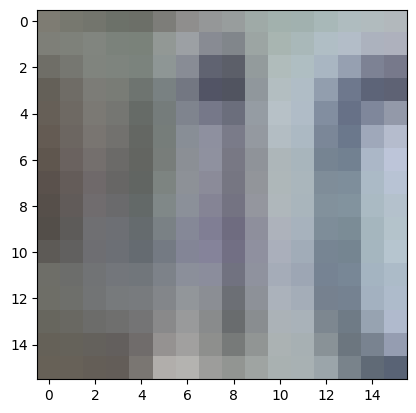

In [256]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(labels)

# show images
imshow(torchvision.utils.make_grid(images))

In [257]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cpu")

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 1 * 1, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.size())
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print(x.size())
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [258]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [259]:
st_time = time.time()
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 400 == 399:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 400:.3f}')
            running_loss = 0.0
ed_time = time.time()
print('Finished Training')
print('time taken: ', ed_time - st_time)

[1,   400] loss: 0.696
[1,   800] loss: 0.695
[1,  1200] loss: 0.696
[1,  1600] loss: 0.694
[1,  2000] loss: 0.694
[2,   400] loss: 0.695
[2,   800] loss: 0.695
[2,  1200] loss: 0.696
[2,  1600] loss: 0.691
[2,  2000] loss: 0.695
[3,   400] loss: 0.691
[3,   800] loss: 0.694
[3,  1200] loss: 0.692
[3,  1600] loss: 0.694
[3,  2000] loss: 0.690
[4,   400] loss: 0.685
[4,   800] loss: 0.678
[4,  1200] loss: 0.651
[4,  1600] loss: 0.582
[4,  2000] loss: 0.522
[5,   400] loss: 0.435
[5,   800] loss: 0.445
[5,  1200] loss: 0.463
[5,  1600] loss: 0.415
[5,  2000] loss: 0.399
Finished Training
time taken:  11.390844583511353


In [260]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 85 %
